In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')

In [3]:
df = df[df['CustomerID'].notnull()].reset_index(drop=True).copy()
df['CustomerID'] = df['CustomerID'].astype(int)
df = df[df['Quantity'] > 0 ].reset_index(drop=True).copy()
df = df[df['UnitPrice'] > 0 ].reset_index(drop=True).copy()

### 시간대별 거래 확인
- 언제 Push 알람을 보내야 할까 ?

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [5]:
df['InvoiceHour'] = df['InvoiceDate'].dt.hour

In [6]:
df_hour = df.groupby(['InvoiceHour'])['CustomerID'].count().reset_index()

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

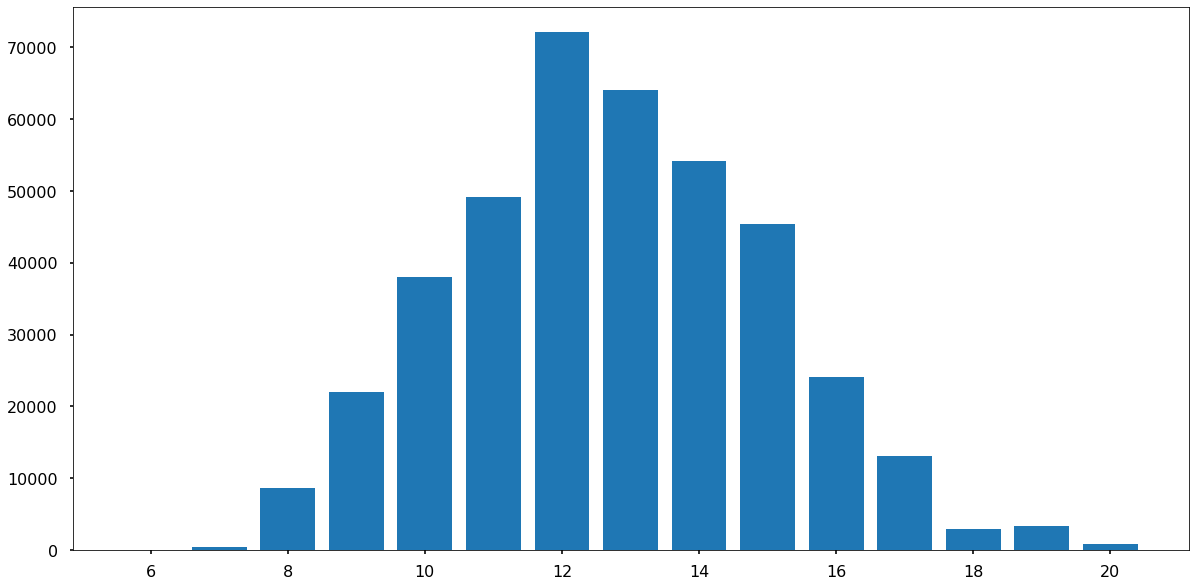

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(df_hour.InvoiceHour, df_hour.CustomerID)
plt.show()

### 개인 맞춤형 push 알람 시간 찾기
- 개인별 가장 구매 시간 확인

In [9]:
df_indiv = df.groupby(['CustomerID', 'InvoiceHour'])['Quantity'].count()

In [10]:
df_indiv

CustomerID  InvoiceHour
12346       10              1
12347       8              22
            10             24
            12             47
            13             18
                           ..
18283       15              1
            16             56
            19             87
18287       9               3
            10             67
Name: Quantity, Length: 11205, dtype: int64

In [11]:
df_indiv.groupby(['CustomerID']).idxmax()

CustomerID
12346    (12346, 10)
12347    (12347, 14)
12348    (12348, 19)
12349     (12349, 9)
12350    (12350, 16)
            ...     
18280     (18280, 9)
18281    (18281, 10)
18282    (18282, 13)
18283    (18283, 14)
18287    (18287, 10)
Name: Quantity, Length: 4338, dtype: object

In [12]:
df_indiv = df_indiv.loc[df_indiv.groupby(['CustomerID']).idxmax()].reset_index()
df_indiv

,CustomerID,InvoiceHour,Quantity
0,12346,10,1
1,12347,14,60
2,12348,19,17
3,12349,9,73
4,12350,16,17
...,...,...,...
4333,18280,9,10
4334,18281,10,7
4335,18282,13,7
4336,18283,14,201


In [13]:
df_indiv.groupby(['InvoiceHour']).groups

{7: [73, 269, 319, 344, 375, 893, 1667, 2317], 8: [46, 58, 87, 126, 172, 179, 187, 260, 278, 279, 282, 292, 306, 347, 399, 429, 496, 503, 526, 533, 549, 552, 651, 671, 747, 755, 784, 792, 800, 803, 806, 821, 838, 877, 883, 920, 944, 947, 951, 954, 1008, 1093, 1106, 1120, 1138, 1172, 1173, 1217, 1251, 1397, 1422, 1424, 1436, 1472, 1512, 1616, 1621, 1666, 1668, 1678, 1687, 1734, 1759, 1761, 1774, 1791, 1815, 1827, 1846, 1859, 1895, 1900, 1903, 1996, 2018, 2023, 2054, 2085, 2108, 2117, 2167, 2172, 2253, 2380, 2383, 2403, 2404, 2417, 2427, 2462, 2464, 2643, 2749, 2776, 2781, 2896, 2936, 2949, 3021, 3130, ...], 9: [3, 9, 26, 30, 33, 35, 37, 48, 60, 66, 75, 84, 86, 90, 100, 106, 107, 121, 127, 135, 138, 142, 144, 146, 154, 159, 181, 199, 230, 240, 264, 265, 267, 277, 280, 286, 294, 298, 328, 333, 336, 342, 343, 352, 362, 366, 385, 402, 421, 459, 470, 475, 478, 482, 483, 509, 517, 519, 574, 603, 615, 630, 636, 642, 644, 691, 701, 706, 707, 746, 749, 752, 764, 770, 781, 783, 818, 825, 829, 844